<a href="https://colab.research.google.com/github/Munsif-Raza-T/Machine-Learning/blob/main/Stock_Transaction_Type_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('InsiderPrices.csv')

In [3]:
data

,Unnamed: 0,Symbol,Owner,Relationship,Date,Cost,# Shares,Value($),Total Shares,Filing,Type,currentprice,movingaverage
0,1,EVR,Walsh Robert B,Principal Financial Officer,"Apr 23, 2020",$50.14,2000,100280,105542,"Apr 24, 2020, 06:04 PM",buy,47.61000061035156,71.43555569118924
1,2,DSNY,Graber Mark A,10% Owner,"Apr 20, 2020",$0.60,13000,7800,1162777,"Apr 24, 2020, 05:54 PM",buy,0.75,0.8917727735307481
2,3,RVP,SHAW THOMAS J,President and CEO,"Apr 24, 2020",$3.10,800,2480,14553806,"Apr 24, 2020, 05:46 PM",buy,3.0999999046325684,1.373222224911054
3,4,RVP,SHAW THOMAS J,President and CEO,"Apr 23, 2020",$3.01,300,903,14553006,"Apr 24, 2020, 05:46 PM",buy,3.0999999046325684,1.373222224911054
4,5,ICMB,Investcorp BDC Holdings Ltd,10% Owner,"Apr 23, 2020",$4.78,3080,14732,469920,"Apr 24, 2020, 05:39 PM",buy,4.760000228881836,6.3100555506017475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,97,NBAC,Xiong Wenhui,Chief Executive Officer,"Apr 20, 2020",$0.00,100000,10,1545000,"Apr 21, 2020, 05:09 PM",sell,na,na
607,98,TRHC,Knowlton Orsula V,President,"Apr 17, 2020",$56.77,8000,454129,757202,"Apr 21, 2020, 05:04 PM",sell,60.869998931884766,52.591499922010634
608,99,MRNA,Bancel Stephane,Chief Executive Officer,"Apr 17, 2020",$46.35,11046,511936,651166,"Apr 21, 2020, 05:03 PM",sell,50.5,21.125277757644653
609,100,MRNA,Bancel Stephane,Chief Executive Officer,"Apr 20, 2020",$45.00,12807,576315,9210628,"Apr 21, 2020, 05:03 PM",sell,50.5,21.125277757644653


In [4]:
columns = list(data.columns)
columns

['Unnamed: 0',
 'Symbol',
 'Owner',
 'Relationship',
 'Date',
 'Cost',
 '# Shares',
 'Value($)',
 'Total Shares',
 'Filing',
 'Type',
 'currentprice',
 'movingaverage']

In [5]:
data.isnull().sum()

Unnamed: 0       0
Symbol           0
Owner            0
Relationship     0
Date             0
Cost             0
# Shares         0
Value($)         0
Total Shares     0
Filing           0
Type             0
currentprice     0
movingaverage    0
dtype: int64

This shows that there are no null values in data.

In [6]:
data.dtypes

Unnamed: 0        int64
Symbol           object
Owner            object
Relationship     object
Date             object
Cost             object
# Shares          int64
Value($)          int64
Total Shares      int64
Filing           object
Type             object
currentprice     object
movingaverage    object
dtype: object

In [7]:
# Since we don't need unnamed: 0 and date column because date is already in filing
data = data.drop(['Unnamed: 0', 'Date'], axis=1)

In [8]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Filing,Type,currentprice,movingaverage
0,EVR,Walsh Robert B,Principal Financial Officer,$50.14,2000,100280,105542,"Apr 24, 2020, 06:04 PM",buy,47.61000061035156,71.43555569118924
1,DSNY,Graber Mark A,10% Owner,$0.60,13000,7800,1162777,"Apr 24, 2020, 05:54 PM",buy,0.75,0.8917727735307481
2,RVP,SHAW THOMAS J,President and CEO,$3.10,800,2480,14553806,"Apr 24, 2020, 05:46 PM",buy,3.0999999046325684,1.373222224911054
3,RVP,SHAW THOMAS J,President and CEO,$3.01,300,903,14553006,"Apr 24, 2020, 05:46 PM",buy,3.0999999046325684,1.373222224911054
4,ICMB,Investcorp BDC Holdings Ltd,10% Owner,$4.78,3080,14732,469920,"Apr 24, 2020, 05:39 PM",buy,4.760000228881836,6.3100555506017475
...,...,...,...,...,...,...,...,...,...,...,...
606,NBAC,Xiong Wenhui,Chief Executive Officer,$0.00,100000,10,1545000,"Apr 21, 2020, 05:09 PM",sell,na,na
607,TRHC,Knowlton Orsula V,President,$56.77,8000,454129,757202,"Apr 21, 2020, 05:04 PM",sell,60.869998931884766,52.591499922010634
608,MRNA,Bancel Stephane,Chief Executive Officer,$46.35,11046,511936,651166,"Apr 21, 2020, 05:03 PM",sell,50.5,21.125277757644653
609,MRNA,Bancel Stephane,Chief Executive Officer,$45.00,12807,576315,9210628,"Apr 21, 2020, 05:03 PM",sell,50.5,21.125277757644653


In [9]:
str_cols = list(data.columns)
str_cols.remove('# Shares')
str_cols.remove('Value($)')
str_cols.remove('Total Shares')
# removing leading and trailing characters from columns with str type
for i in str_cols:
    data[i] = data[i].str.strip()

In [10]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Filing,Type,currentprice,movingaverage
0,EVR,Walsh Robert B,Principal Financial Officer,$50.14,2000,100280,105542,"Apr 24, 2020, 06:04 PM",buy,47.61000061035156,71.43555569118924
1,DSNY,Graber Mark A,10% Owner,$0.60,13000,7800,1162777,"Apr 24, 2020, 05:54 PM",buy,0.75,0.8917727735307481
2,RVP,SHAW THOMAS J,President and CEO,$3.10,800,2480,14553806,"Apr 24, 2020, 05:46 PM",buy,3.0999999046325684,1.373222224911054
3,RVP,SHAW THOMAS J,President and CEO,$3.01,300,903,14553006,"Apr 24, 2020, 05:46 PM",buy,3.0999999046325684,1.373222224911054
4,ICMB,Investcorp BDC Holdings Ltd,10% Owner,$4.78,3080,14732,469920,"Apr 24, 2020, 05:39 PM",buy,4.760000228881836,6.3100555506017475
...,...,...,...,...,...,...,...,...,...,...,...
606,NBAC,Xiong Wenhui,Chief Executive Officer,$0.00,100000,10,1545000,"Apr 21, 2020, 05:09 PM",sell,na,na
607,TRHC,Knowlton Orsula V,President,$56.77,8000,454129,757202,"Apr 21, 2020, 05:04 PM",sell,60.869998931884766,52.591499922010634
608,MRNA,Bancel Stephane,Chief Executive Officer,$46.35,11046,511936,651166,"Apr 21, 2020, 05:03 PM",sell,50.5,21.125277757644653
609,MRNA,Bancel Stephane,Chief Executive Officer,$45.00,12807,576315,9210628,"Apr 21, 2020, 05:03 PM",sell,50.5,21.125277757644653


In [11]:
# Assume that the dataframe is named "data"
data['Filing'] = pd.to_datetime(data['Filing'])
data['month'] = data['Filing'].dt.month
data['day'] = data['Filing'].dt.day
data['year'] = data['Filing'].dt.year
data['time'] = data['Filing'].dt.time

In [12]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Filing,Type,currentprice,movingaverage,month,day,year,time
0,EVR,Walsh Robert B,Principal Financial Officer,$50.14,2000,100280,105542,2020-04-24 18:04:00,buy,47.61000061035156,71.43555569118924,4,24,2020,18:04:00
1,DSNY,Graber Mark A,10% Owner,$0.60,13000,7800,1162777,2020-04-24 17:54:00,buy,0.75,0.8917727735307481,4,24,2020,17:54:00
2,RVP,SHAW THOMAS J,President and CEO,$3.10,800,2480,14553806,2020-04-24 17:46:00,buy,3.0999999046325684,1.373222224911054,4,24,2020,17:46:00
3,RVP,SHAW THOMAS J,President and CEO,$3.01,300,903,14553006,2020-04-24 17:46:00,buy,3.0999999046325684,1.373222224911054,4,24,2020,17:46:00
4,ICMB,Investcorp BDC Holdings Ltd,10% Owner,$4.78,3080,14732,469920,2020-04-24 17:39:00,buy,4.760000228881836,6.3100555506017475,4,24,2020,17:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NBAC,Xiong Wenhui,Chief Executive Officer,$0.00,100000,10,1545000,2020-04-21 17:09:00,sell,na,na,4,21,2020,17:09:00
607,TRHC,Knowlton Orsula V,President,$56.77,8000,454129,757202,2020-04-21 17:04:00,sell,60.869998931884766,52.591499922010634,4,21,2020,17:04:00
608,MRNA,Bancel Stephane,Chief Executive Officer,$46.35,11046,511936,651166,2020-04-21 17:03:00,sell,50.5,21.125277757644653,4,21,2020,17:03:00
609,MRNA,Bancel Stephane,Chief Executive Officer,$45.00,12807,576315,9210628,2020-04-21 17:03:00,sell,50.5,21.125277757644653,4,21,2020,17:03:00


In [13]:
# Now drop Filing column
data = data.drop('Filing', axis=1)

In [14]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Type,currentprice,movingaverage,month,day,year,time
0,EVR,Walsh Robert B,Principal Financial Officer,$50.14,2000,100280,105542,buy,47.61000061035156,71.43555569118924,4,24,2020,18:04:00
1,DSNY,Graber Mark A,10% Owner,$0.60,13000,7800,1162777,buy,0.75,0.8917727735307481,4,24,2020,17:54:00
2,RVP,SHAW THOMAS J,President and CEO,$3.10,800,2480,14553806,buy,3.0999999046325684,1.373222224911054,4,24,2020,17:46:00
3,RVP,SHAW THOMAS J,President and CEO,$3.01,300,903,14553006,buy,3.0999999046325684,1.373222224911054,4,24,2020,17:46:00
4,ICMB,Investcorp BDC Holdings Ltd,10% Owner,$4.78,3080,14732,469920,buy,4.760000228881836,6.3100555506017475,4,24,2020,17:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NBAC,Xiong Wenhui,Chief Executive Officer,$0.00,100000,10,1545000,sell,na,na,4,21,2020,17:09:00
607,TRHC,Knowlton Orsula V,President,$56.77,8000,454129,757202,sell,60.869998931884766,52.591499922010634,4,21,2020,17:04:00
608,MRNA,Bancel Stephane,Chief Executive Officer,$46.35,11046,511936,651166,sell,50.5,21.125277757644653,4,21,2020,17:03:00
609,MRNA,Bancel Stephane,Chief Executive Officer,$45.00,12807,576315,9210628,sell,50.5,21.125277757644653,4,21,2020,17:03:00


In [15]:
rows_with_na = data[data.eq('na').any(1)]
print(rows_with_na)
print('Number of rows having na string', len(rows_with_na))

         Symbol                        Owner             Relationship    Cost  \
171        NBAC  NeoGenesis Holding Co. Ltd.                10% Owner  $10.00   
172        NBAC                 Xiong Wenhui  Chief Executive Officer  $10.00   
295       CADXX    CION Ares Management, LLC                10% Owner  $21.79   
306        MIGT                KOK SENG YEAP                      CEO   $0.00   
307        MIGT                KOK SENG YEAP                      CEO   $0.00   
363  OPGN,OPGNW  Curetis N.V. in Liquidation                10% Owner   $2.17   
364  OPGN,OPGNW  Curetis N.V. in Liquidation                10% Owner   $2.24   
365       GGO.A              GABELLI MARIO J                 Director  $40.25   
366       GGO.A              GABELLI MARIO J                 Director  $40.26   
543       GGO.A              GABELLI MARIO J                 Director  $40.23   
544       GGO.A              GABELLI MARIO J                 Director  $40.18   
569  OPGN,OPGNW  Curetis N.V

In [16]:
# Find the index of the rows that contain the 'na' string in any column
index_to_drop = data[data.eq('na').any(1)].index

# Drop the rows that contain the 'na' string in any column
data = data.drop(index_to_drop)

In [17]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Type,currentprice,movingaverage,month,day,year,time
0,EVR,Walsh Robert B,Principal Financial Officer,$50.14,2000,100280,105542,buy,47.61000061035156,71.43555569118924,4,24,2020,18:04:00
1,DSNY,Graber Mark A,10% Owner,$0.60,13000,7800,1162777,buy,0.75,0.8917727735307481,4,24,2020,17:54:00
2,RVP,SHAW THOMAS J,President and CEO,$3.10,800,2480,14553806,buy,3.0999999046325684,1.373222224911054,4,24,2020,17:46:00
3,RVP,SHAW THOMAS J,President and CEO,$3.01,300,903,14553006,buy,3.0999999046325684,1.373222224911054,4,24,2020,17:46:00
4,ICMB,Investcorp BDC Holdings Ltd,10% Owner,$4.78,3080,14732,469920,buy,4.760000228881836,6.3100555506017475,4,24,2020,17:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,UPWK,Brown Hayden,President & CEO,$7.72,895,6908,341949,sell,7.889999866485596,11.074444450272454,4,21,2020,17:11:00
607,TRHC,Knowlton Orsula V,President,$56.77,8000,454129,757202,sell,60.869998931884766,52.591499922010634,4,21,2020,17:04:00
608,MRNA,Bancel Stephane,Chief Executive Officer,$46.35,11046,511936,651166,sell,50.5,21.125277757644653,4,21,2020,17:03:00
609,MRNA,Bancel Stephane,Chief Executive Officer,$45.00,12807,576315,9210628,sell,50.5,21.125277757644653,4,21,2020,17:03:00


In [18]:
# Get the unique values of each column
unique_values = data.nunique()

# Print the unique values of each column
print(unique_values)

Symbol           241
Owner            324
Relationship     117
Cost             432
# Shares         369
Value($)         533
Total Shares     529
Type               2
currentprice     236
movingaverage    241
month              1
day                6
year               1
time             257
dtype: int64


In [19]:
# By the data we know that we have data of same month and year so there is no much use of these columns.
# Now drop month(April), year(2020) columns
data = data.drop(['month', 'year'], axis=1)

In [20]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Type,currentprice,movingaverage,day,time
0,EVR,Walsh Robert B,Principal Financial Officer,$50.14,2000,100280,105542,buy,47.61000061035156,71.43555569118924,24,18:04:00
1,DSNY,Graber Mark A,10% Owner,$0.60,13000,7800,1162777,buy,0.75,0.8917727735307481,24,17:54:00
2,RVP,SHAW THOMAS J,President and CEO,$3.10,800,2480,14553806,buy,3.0999999046325684,1.373222224911054,24,17:46:00
3,RVP,SHAW THOMAS J,President and CEO,$3.01,300,903,14553006,buy,3.0999999046325684,1.373222224911054,24,17:46:00
4,ICMB,Investcorp BDC Holdings Ltd,10% Owner,$4.78,3080,14732,469920,buy,4.760000228881836,6.3100555506017475,24,17:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...
604,UPWK,Brown Hayden,President & CEO,$7.72,895,6908,341949,sell,7.889999866485596,11.074444450272454,21,17:11:00
607,TRHC,Knowlton Orsula V,President,$56.77,8000,454129,757202,sell,60.869998931884766,52.591499922010634,21,17:04:00
608,MRNA,Bancel Stephane,Chief Executive Officer,$46.35,11046,511936,651166,sell,50.5,21.125277757644653,21,17:03:00
609,MRNA,Bancel Stephane,Chief Executive Officer,$45.00,12807,576315,9210628,sell,50.5,21.125277757644653,21,17:03:00


In [21]:
# Any rows having $0.00
rows_with_zero_cost = data[data['Cost'].str.contains("$0.00")]
print(rows_with_zero_cost)

Empty DataFrame
Columns: [Symbol, Owner, Relationship, Cost, # Shares, Value($), Total Shares, Type, currentprice, movingaverage, day, time]
Index: []


In [22]:
rows_with_zero_shares = data[data['# Shares'] == 0]
print(rows_with_zero_shares)

Empty DataFrame
Columns: [Symbol, Owner, Relationship, Cost, # Shares, Value($), Total Shares, Type, currentprice, movingaverage, day, time]
Index: []


In [23]:
# Remove '$' sign from 'cost' column
data['Cost'] = data['Cost'].replace({'\$':''}, regex = True)

# Convert 'cost' column to integer
data['Cost'] = data['Cost'].astype(float)


In [24]:
# Create a mapping dictionary
mapping = {'sell': 0, 'buy': 1}

# Use the .replace() method to map the 'Type' column to numerical data
data['Type'] = data['Type'].replace(mapping)

In [25]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Type,currentprice,movingaverage,day,time
0,EVR,Walsh Robert B,Principal Financial Officer,50.14,2000,100280,105542,1,47.61000061035156,71.43555569118924,24,18:04:00
1,DSNY,Graber Mark A,10% Owner,0.60,13000,7800,1162777,1,0.75,0.8917727735307481,24,17:54:00
2,RVP,SHAW THOMAS J,President and CEO,3.10,800,2480,14553806,1,3.0999999046325684,1.373222224911054,24,17:46:00
3,RVP,SHAW THOMAS J,President and CEO,3.01,300,903,14553006,1,3.0999999046325684,1.373222224911054,24,17:46:00
4,ICMB,Investcorp BDC Holdings Ltd,10% Owner,4.78,3080,14732,469920,1,4.760000228881836,6.3100555506017475,24,17:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...
604,UPWK,Brown Hayden,President & CEO,7.72,895,6908,341949,0,7.889999866485596,11.074444450272454,21,17:11:00
607,TRHC,Knowlton Orsula V,President,56.77,8000,454129,757202,0,60.869998931884766,52.591499922010634,21,17:04:00
608,MRNA,Bancel Stephane,Chief Executive Officer,46.35,11046,511936,651166,0,50.5,21.125277757644653,21,17:03:00
609,MRNA,Bancel Stephane,Chief Executive Officer,45.00,12807,576315,9210628,0,50.5,21.125277757644653,21,17:03:00


In [26]:
# To see the correlation between the columns
correlations = data.corr()
print(correlations)

                  Cost  # Shares  Value($)  Total Shares      Type       day
Cost          1.000000  0.550857  0.999995      0.029798  0.039168 -0.034819
# Shares      0.550857  1.000000  0.550973      0.173963  0.071158 -0.072944
Value($)      0.999995  0.550973  1.000000      0.029996  0.039968 -0.035158
Total Shares  0.029798  0.173963  0.029996      1.000000  0.118457 -0.021800
Type          0.039168  0.071158  0.039968      0.118457  1.000000 -0.315004
day          -0.034819 -0.072944 -0.035158     -0.021800 -0.315004  1.000000


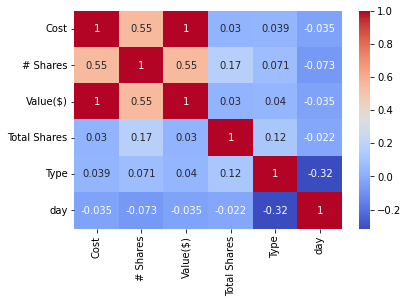

In [27]:
# Create the heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

<Figure size 3600x3600 with 0 Axes>

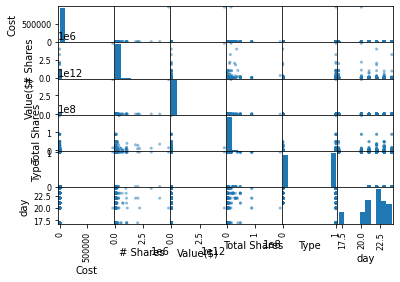

In [31]:
plt.figure(figsize=(50,50))
pd.plotting.scatter_matrix(data)
plt.show()

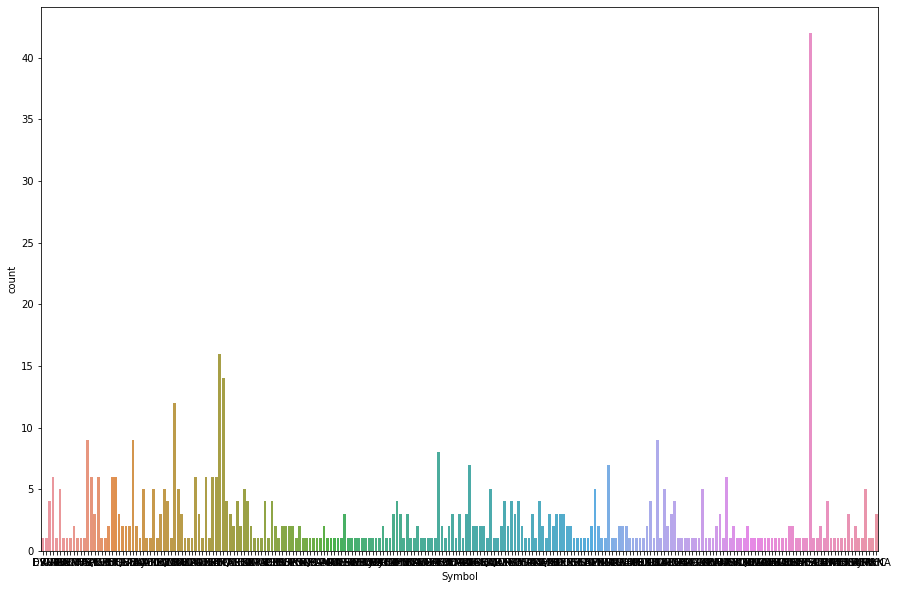

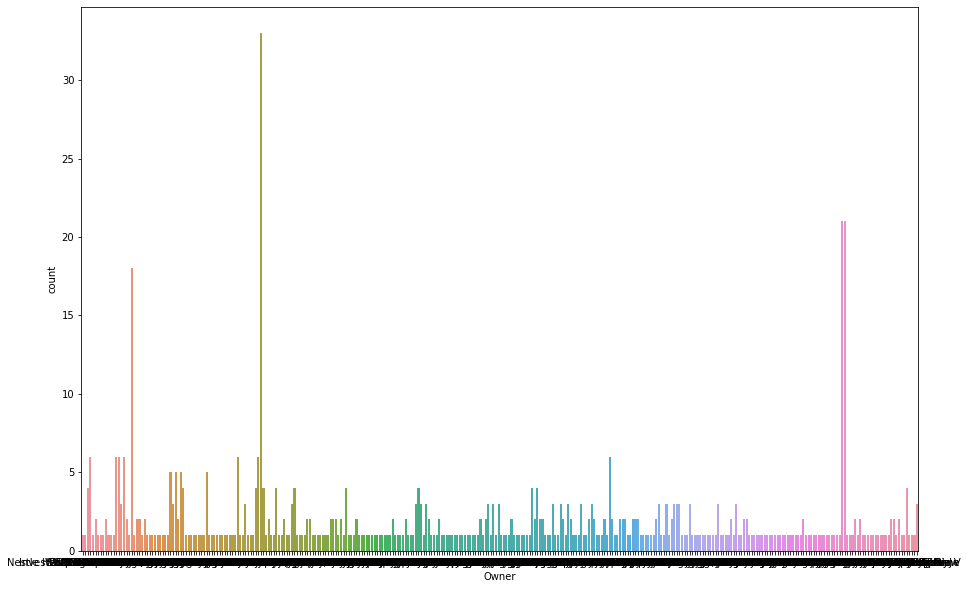

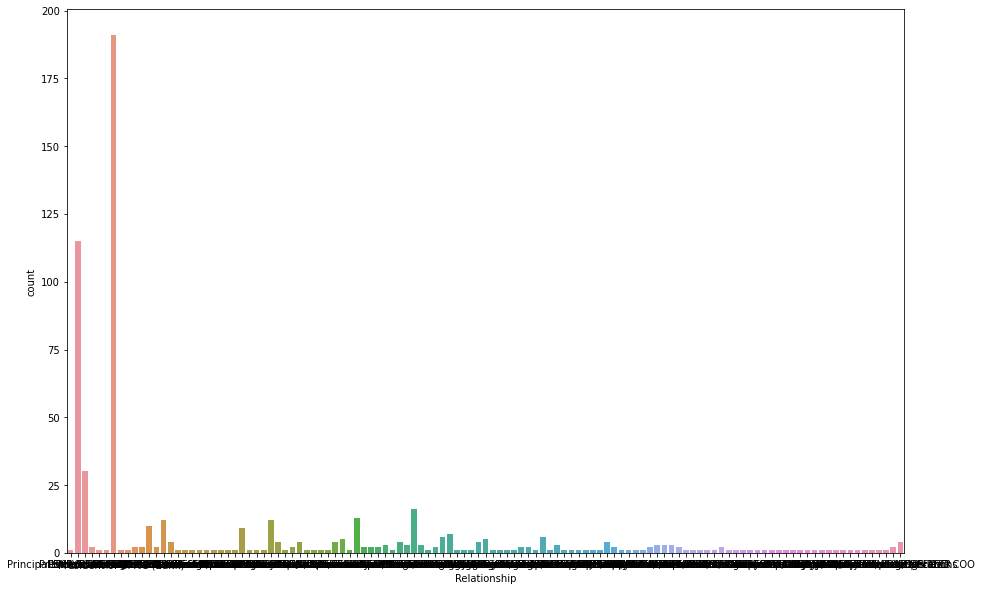

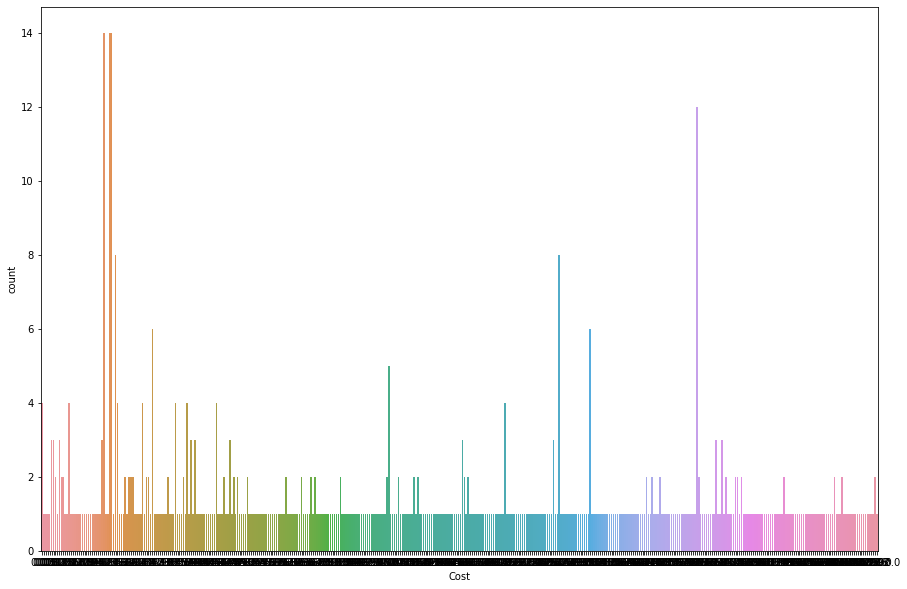

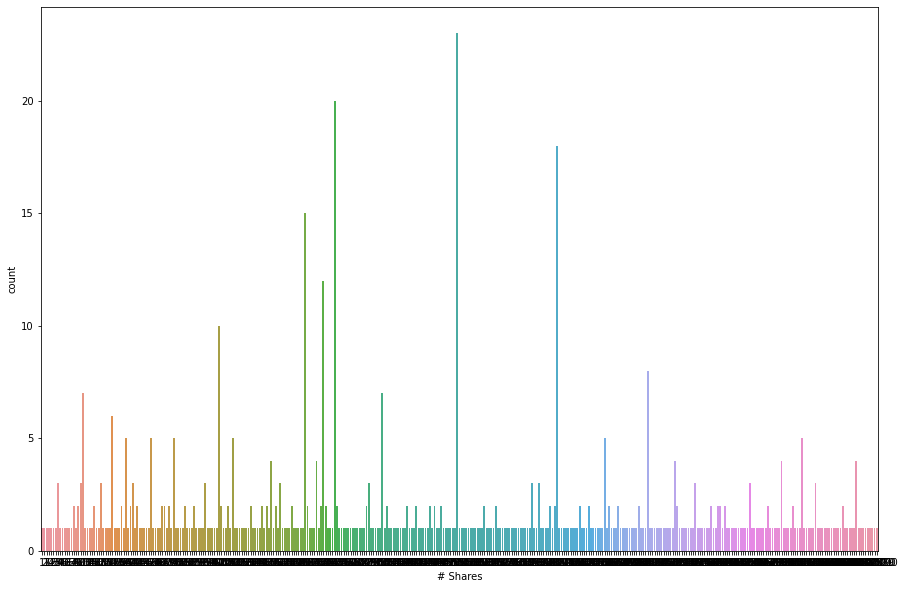

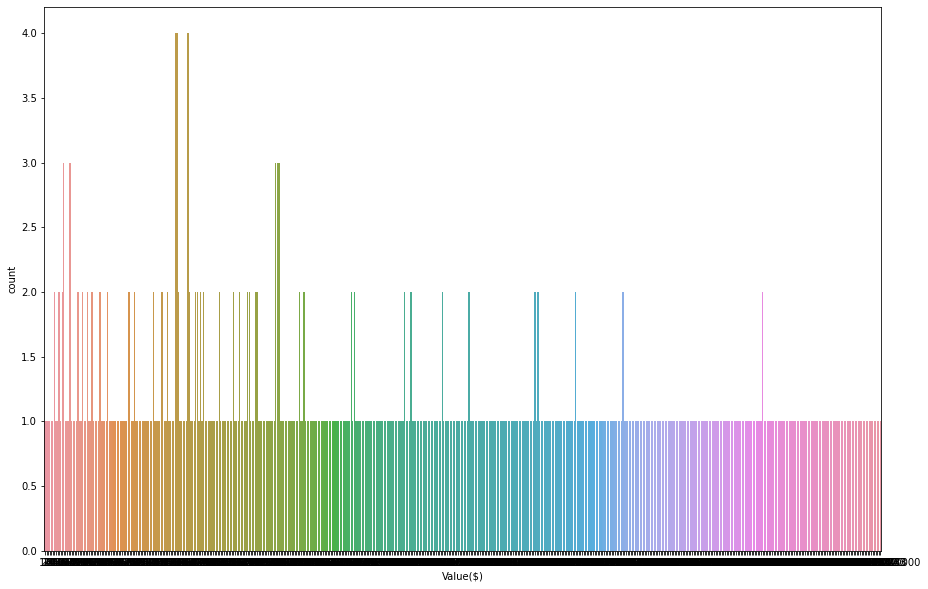

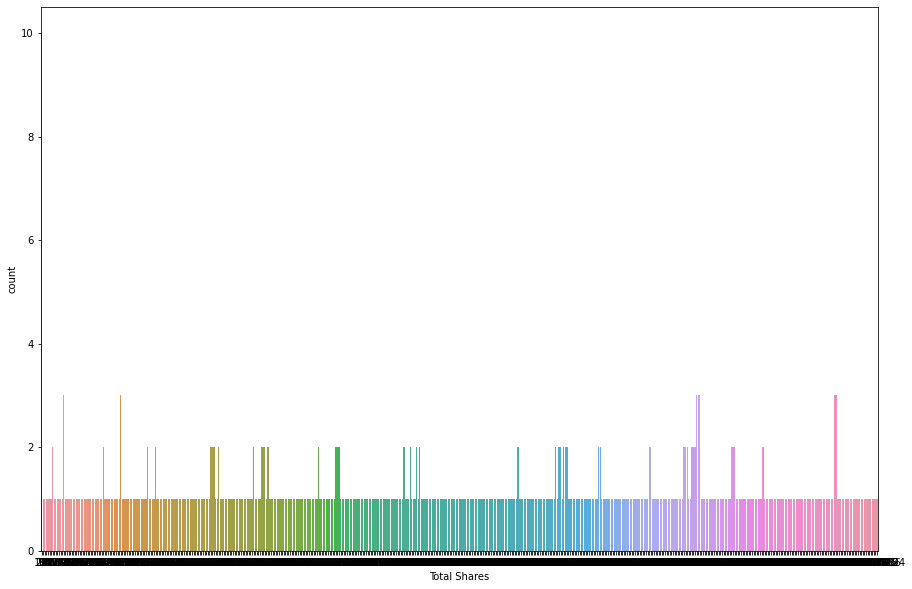

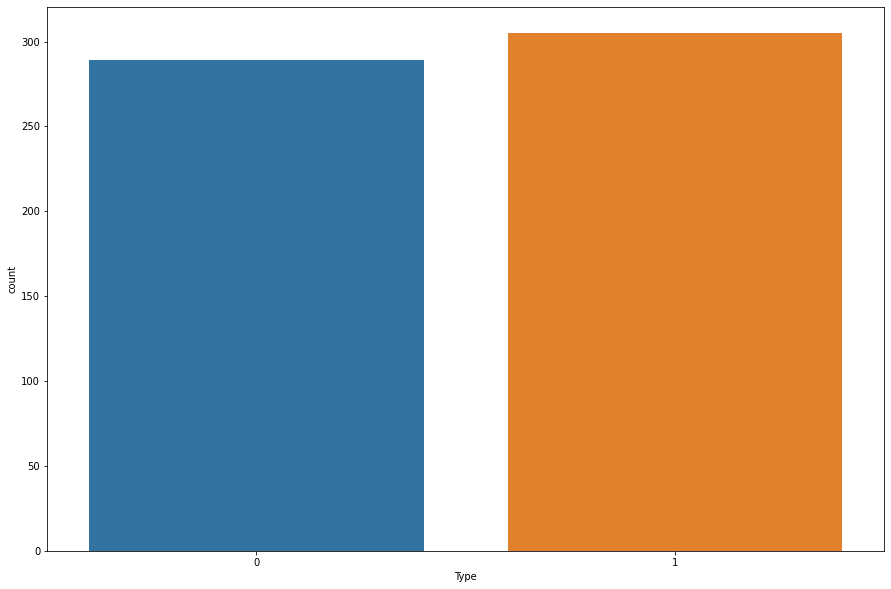

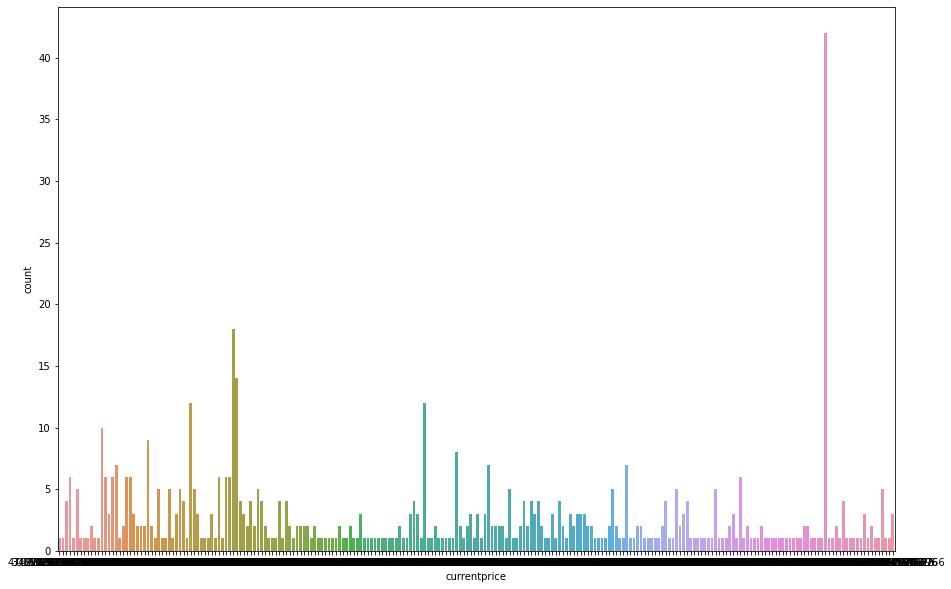

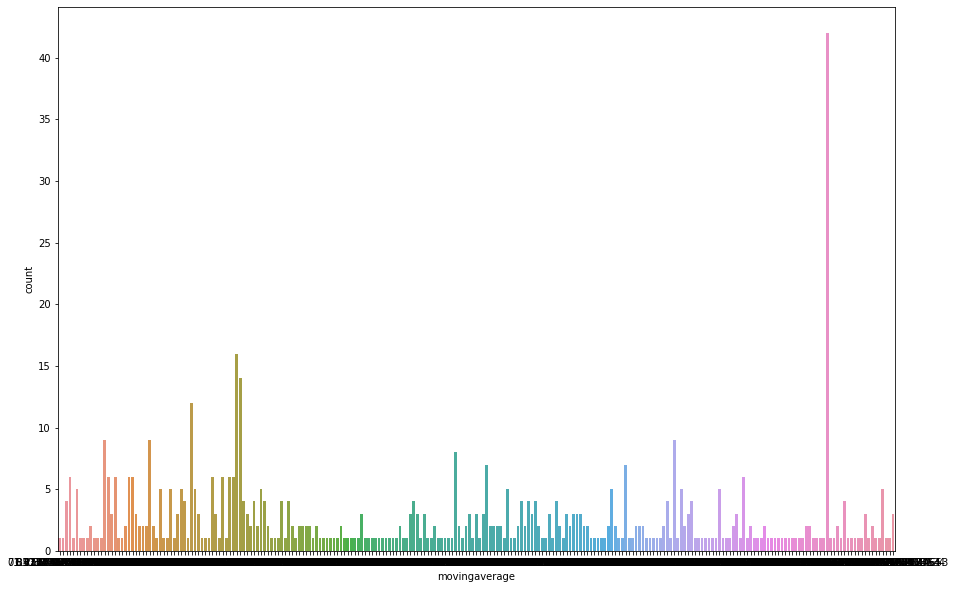

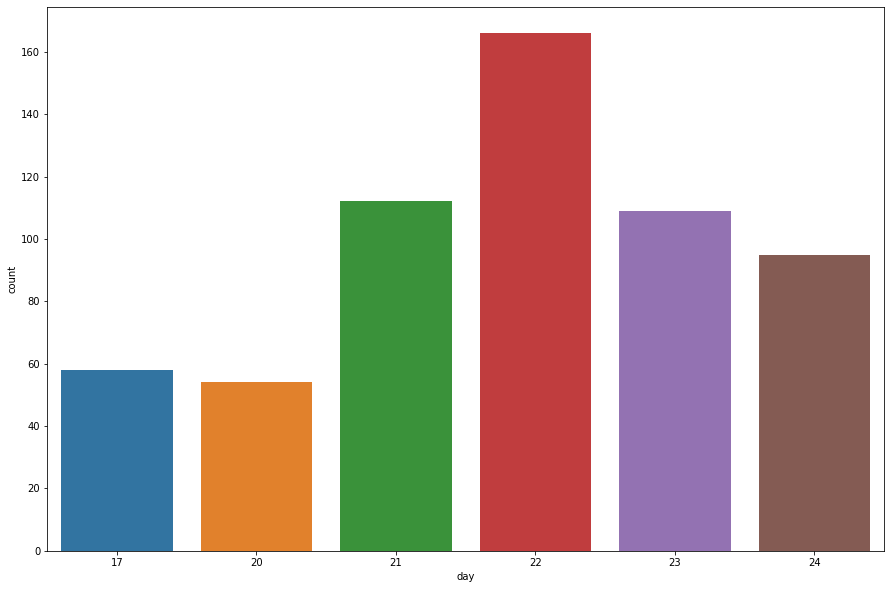

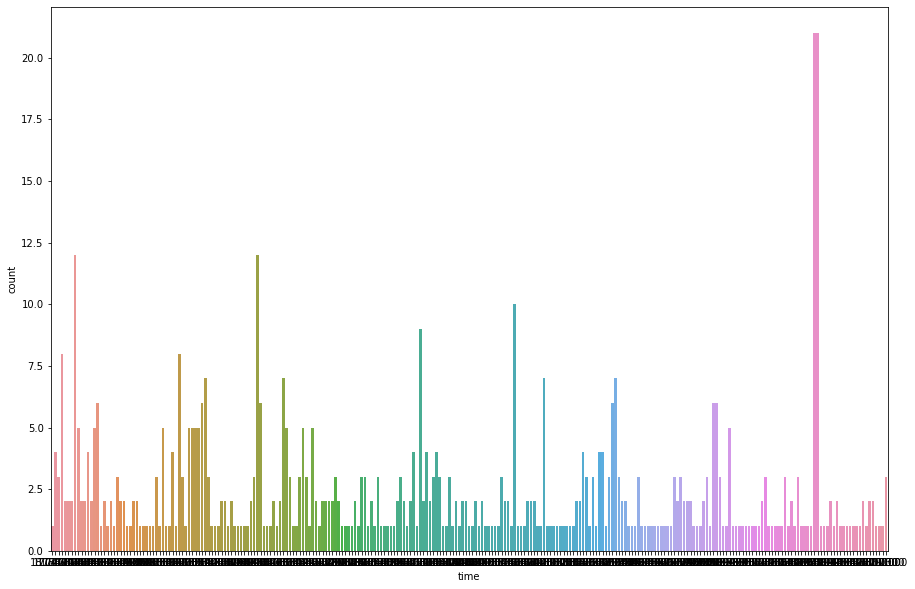

In [33]:
# Count plot
for column in data.columns:
    plt.figure(figsize=(15,10))
    sns.countplot(x=column, data=data)
    plt.show()

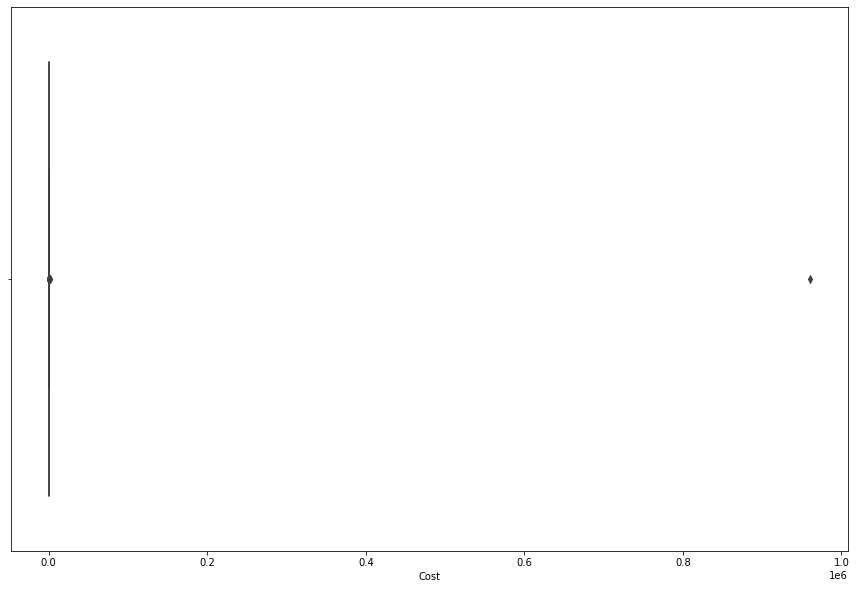

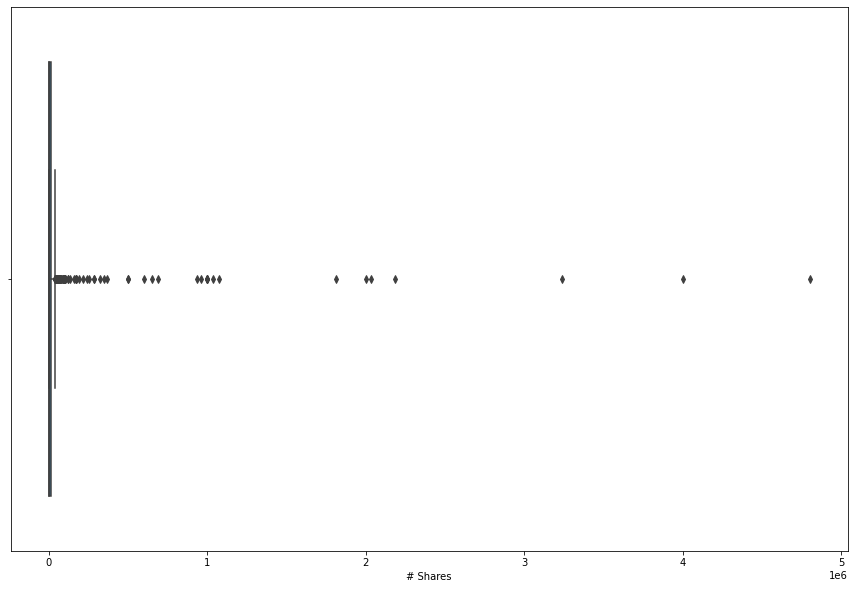

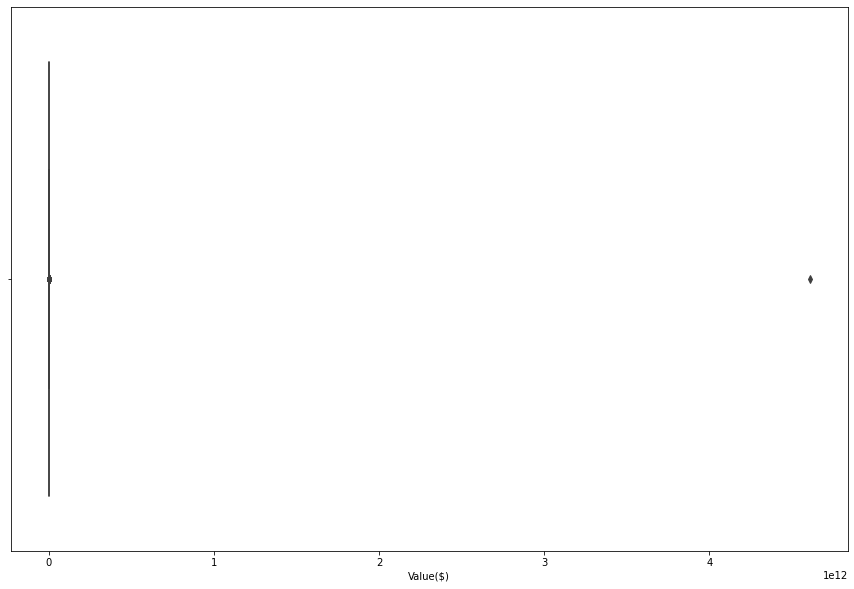

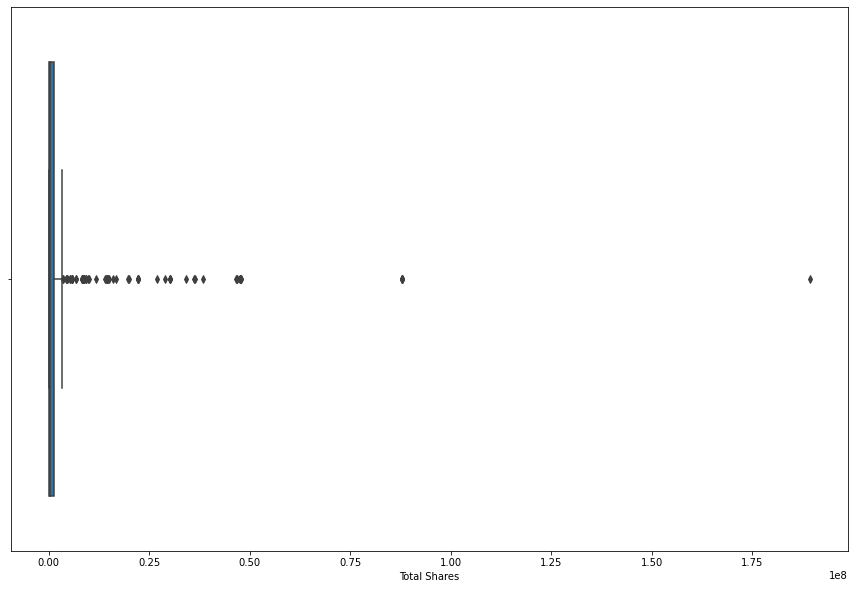

In [37]:
# Boxplots to see the outliers
numeric_dataframe = data[['Cost',  '# Shares',  'Value($)',  'Total Shares']]
for column in numeric_dataframe.columns:
    plt.figure(figsize=(15,10))
    sns.boxplot(x=data[column])
    plt.show()


In [38]:
# Transforming categorical data into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

In [39]:
data

,Symbol,Owner,Relationship,Cost,# Shares,Value($),Total Shares,Type,currentprice,movingaverage,day,time
0,73,319,90,50.14,2000,100280,105542,1,167,217,24,170
1,62,117,0,0.60,13000,7800,1162777,1,13,11,24,165
2,189,261,77,3.10,800,2480,14553806,1,124,14,24,162
3,189,261,77,3.01,300,903,14553006,1,124,14,24,162
4,105,146,0,4.78,3080,14732,469920,1,153,200,24,160
...,...,...,...,...,...,...,...,...,...,...,...,...
604,228,37,76,7.72,895,6908,341949,0,208,32,21,142
607,216,171,75,56.77,8000,454129,757202,0,192,190,21,137
608,140,15,29,46.35,11046,511936,651166,0,178,98,21,136
609,140,15,29,45.00,12807,576315,9210628,0,178,98,21,136


In [40]:
# Preparing data for train test data
from sklearn.model_selection import train_test_split
X = data.drop("Type", axis=1)
y = data["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Applying KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
# Do predictions
y_pred = knn.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

# y_true represents the true labels
# y_pred represents the predicted labels

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of KNN model: {:.2f}%".format(accuracy*100))

Accuracy of KNN model: 79.83%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


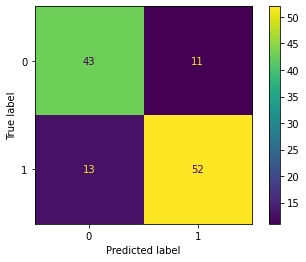

In [49]:
# To make the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test)